# COVID-19 Case Data (San Bernardino)

Data provided by California Health and Human Services Open Data Portal: [California COVID-19 Hospital Data and Case Statistics](https://data.chhs.ca.gov/dataset/california-covid-19-hospital-data-and-case-statistics).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import datetime as dt

df = pd.read_csv("data/covid19data.csv")


In [2]:
df_sb = df[df['County Name'] == 'San Bernardino']

#Check data types of columns.
df_sb.dtypes

County Name                              object
Most Recent Date                         object
Total Count Confirmed                   float64
Total Count Deaths                      float64
COVID-19 Positive Patients              float64
Suspected COVID-19 Positive Patients    float64
ICU COVID-19 Positive Patients          float64
ICU COVID-19 Suspected Patients         float64
dtype: object

In [ ]:
# Significant dates to be added to graphs
sig_dates = [[dt.date(2020, 5, 23), "Dine-in restaruants open"], [dt.date(2020, 5, 26), "Places of worship, hair salons open"]]
for entry in sig_dates:
    entry[0] = entry[0].toordinal()
    sliced = df_sb[df_sb['date_ordinal'] == entry[0]]
    entry.append(sliced['New Confirmed Cases'].max())

C:\Users\shoyr\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


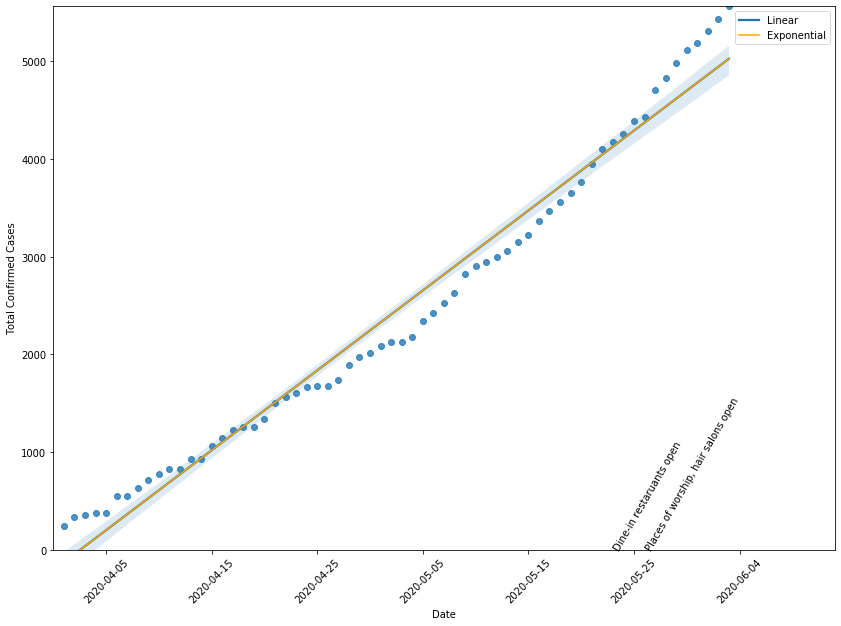

In [40]:
df_sb['date_ordinal'] = pd.to_datetime(df['Most Recent Date']).apply(lambda date: date.toordinal())

#Plot scatter plot
x = df_sb['date_ordinal']
y = df_sb['Total Count Confirmed']

plt.figure(figsize=(14,10))
ax = plt.subplot(1,1,1)

sns.regplot(x='date_ordinal', y='Total Count Confirmed', data=df_sb)

# Formatting axes
ax.set_xlim(x.min() - 1, x.max() + 10)
ax.set_ylim(0, y.max() + 1)
ax.set_xlabel('Date')

labels = [dt.date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(labels)
plt.xticks(rotation = 45)
plt.ylabel("Total Confirmed Cases")

#Exponential Curve
def exponential_func(x, a, b, c):
    return a*np.exp(-b*x)+c

popt, pcov = curve_fit(exponential_func, x, y, p0=(1, 1e-6, 1), maxfev=1000000000) 
plt.plot(x, exponential_func(x, *popt), color='orange')
plt.legend(['Linear', 'Exponential'])

# Inserting Significant Date Labels
for entry in sig_dates:
    plt.annotate(entry[1], xy=(entry[0], 0,), rotation=60)

plt.show()

This graph seems to be relatively linear. However, note that there is a slight curve in this data. Since exponential regression displays a near identical trendline to the linear regression line, this will require further investigation with a "better" model.

## New cases per Day

It may be easier to see how the outbreak in San Bernardino County is progressing through comparing case increases between days. Essentially, if the new cases per day is increasing, the spread of the virus is accelerating and vicaversa. Note that I'm speaking in generalities and there may be other factors influencing the data.

In [14]:
# Generate column with new cases.

lag = df_sb['Total Count Confirmed'].shift(1)
df_sb['New Confirmed Cases'] = df_sb['Total Count Confirmed'] - lag
df_sb.head(5)

C:\Users\shoyr\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,County Name,Most Recent Date,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,date_ordinal,New Confirmed Cases
1,San Bernardino,4/1/2020,245.0,5.0,95.0,196.0,39.0,52.0,737516,NaN
93,San Bernardino,4/2/2020,335.0,8.0,126.0,185.0,50.0,45.0,737517,90.0
152,San Bernardino,4/3/2020,356.0,11.0,118.0,204.0,44.0,53.0,737518,21.0
211,San Bernardino,4/4/2020,373.0,13.0,138.0,254.0,51.0,66.0,737519,17.0
270,San Bernardino,4/5/2020,375.0,13.0,146.0,240.0,59.0,54.0,737520,2.0


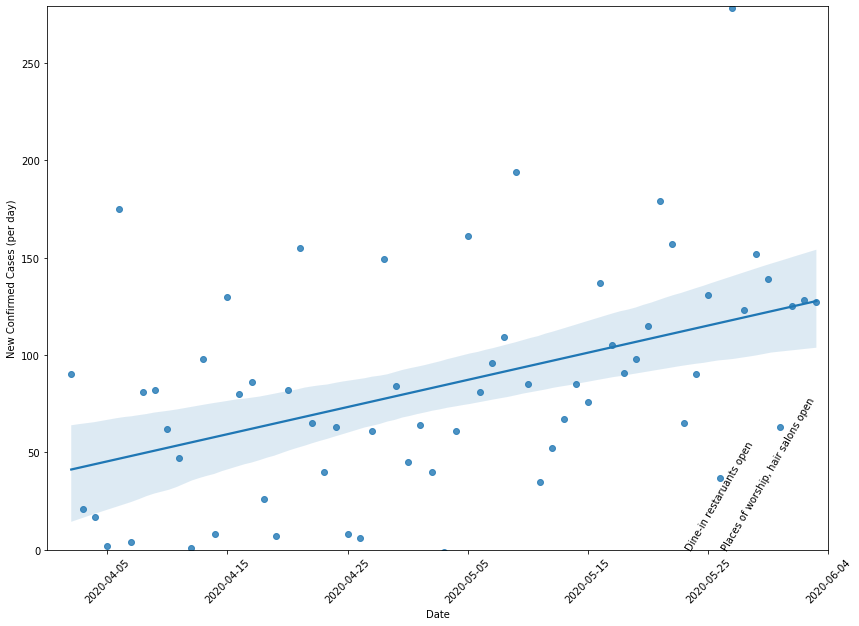

In [39]:
# Plotting new cases per day

plt.figure(figsize=(14,10))
ax = sns.regplot(data=df_sb, x='date_ordinal', y='New Confirmed Cases')

# Formatting
ax.set_xlim(df_sb['date_ordinal'].min() - 1, df_sb['date_ordinal'].max() + 1)
ax.set_ylim(0, df_sb['New Confirmed Cases'].max() + 1)

ax.set_xlabel('Date')
new_labels = [dt.date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
plt.xticks(rotation = 45)
plt.ylabel("New Confirmed Cases (per day)")

# Inserting Significant Date Labels
for entry in sig_dates:
    plt.annotate(entry[1], xy=(entry[0], 0,), rotation=60)

plt.show()

The data suggests a (somewhat tenuous) upward trend in confirmed cases per day in SB county over time. Therefore, the spread of the virus seems to be accelerating.

> Add pearson corr.
> Add label for when testing increased.